# Proyek Analisis Data: Air Quality Dataset
- **Nama:** Ahmad Mufadhdhal Alkifani
- **Email:** ahmadmufadhdhal47@gmail.com
- **ID Dicoding:** a322ybf029

## Menentukan Pertanyaan Bisnis

- Kapan waktu paling beresiko terhadap kesehatan masyarakat akibat polusi udara?
- Apa variabel yang paling berpengaruh terhadap kenaikan polusi terhadap partikulat halus dan partikulat kasar
- Kapan waktu terbaik untuk melakukan aktivitas luar ruangan berdasarkan kualitas udara dan cuaca

## Import Semua Packages/Library yang Digunakan

In [2]:
# memanggil semua library yang dibutuhkan
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# import os

## Data Wrangling

### Gathering Data

In [3]:
#memanggil dataset jika menggunakan 1 dataset
lokasi_data = "dataset/PRSA_Data_Aotizhongxin_20130301-20170228.csv"

data_kualitas_udara = pd.read_csv(lokasi_data)
data_kualitas_udara.head()

# Tentukan lokasi folder
# folder_path = "dataset"

# # Ambil semua nama file .csv di dalam folder
# csv_files = [file for file in os.listdir(folder_path) if file.endswith(".csv")]

# # Baca dan gabungkan semua file CSV
# data_kualitas_udara = pd.concat(
#     [pd.read_csv(os.path.join(folder_path, file)) for file in csv_files],
#     ignore_index=True
# )

# # Tampilkan 5 baris pertama
# data_kualitas_udara.head()


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin


### Assessing Data

In [4]:
# memeriksa tipe data dari dataset
data_kualitas_udara.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34139 non-null  float64
 6   PM10     34346 non-null  float64
 7   SO2      34129 non-null  float64
 8   NO2      34041 non-null  float64
 9   CO       33288 non-null  float64
 10  O3       33345 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34983 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [5]:
#mengecek missing value pada dataset
data_kualitas_udara.isnull().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       925
PM10        718
SO2         935
NO2        1023
CO         1776
O3         1719
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd           81
WSPM         14
station       0
dtype: int64

In [6]:
#memeriksa data duplikasi didalam dataset
print(f"Jumlah data duplikasi: {data_kualitas_udara.duplicated().sum()}")

Jumlah data duplikasi: 0


In [7]:
#memeriksa parameter statistik pada dataset
data_kualitas_udara.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34139.000000,34346.000000,34129.000000,34041.000000,33288.000000,33345.000000,35044.000000,35044.000000,35044.000000,35044.000000,35050.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,82.773611,110.060391,17.375901,59.305833,1262.945145,56.353358,13.584607,1011.846920,3.123062,0.067421,1.708496
std,10122.249256,1.177213,3.448752,8.800218,6.922285,82.135694,95.223005,22.823017,37.116200,1221.436236,57.916327,11.399097,10.404047,13.688896,0.910056,1.204071
min,1.000000,2013.000000,1.000000,1.000000,0.000000,3.000000,2.000000,0.285600,2.000000,100.000000,0.214200,-16.800000,985.900000,-35.300000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,22.000000,38.000000,3.000000,30.000000,500.000000,8.000000,3.100000,1003.300000,-8.100000,0.000000,0.900000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,58.000000,87.000000,9.000000,53.000000,900.000000,42.000000,14.500000,1011.400000,3.800000,0.000000,1.400000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,114.000000,155.000000,21.000000,82.000000,1500.000000,82.000000,23.300000,1020.100000,15.600000,0.000000,2.200000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,898.000000,984.000000,341.000000,290.000000,10000.000000,423.000000,40.500000,1042.000000,28.500000,72.500000,11.200000


### Cleaning Data

#### Dalam proses clean, berikut merupakan tahapan yang akan dilakukan
- Menggabungkan kolom year, mount, day, hour menjadi datetime
- Menangani missing value
- mengganti nama kolom agar mudah dipahami

In [8]:
#menggabungkan kolom year, mount, day dan hour menjadi datetime
data_kualitas_udara["datetime"] = pd.to_datetime(data_kualitas_udara[["year", "month", "day", "hour"]])
data_kualitas_udara.set_index("datetime", inplace=True)

#hapus kolom yang tidak relavan
if "No" in data_kualitas_udara.columns:
    data_kualitas_udara.drop(columns=["No"], inplace=True)
# Hapus kolom year, month, day, dan hour karena sudah tergabung ke dalam datetime
data_kualitas_udara.drop(columns=["year", "month", "day", "hour"], inplace=True)

# Tangani nilai hilang
weather_cols = ["TEMP", "PRES", "DEWP", "RAIN", "WSPM"]
pollution_cols = ["PM2.5", "PM10", "SO2", "NO2", "CO", "O3"]

# Interpolasi data numerik berdasarkan waktu
data_kualitas_udara[weather_cols + pollution_cols] = data_kualitas_udara[weather_cols + pollution_cols].interpolate(method="time")

# Isi nilai hilang pada kolom arah angin dengan modus
if "wd" in data_kualitas_udara.columns:
    data_kualitas_udara["wd"].fillna(data_kualitas_udara["wd"].mode()[0], inplace=True)

# Tangani nilai tidak wajar (outlier sederhana)
# Set nilai negatif yang tidak masuk akal menjadi NaN, lalu interpolasi lagi
for col in pollution_cols + weather_cols:
    data_kualitas_udara[col] = data_kualitas_udara[col].apply(lambda x: np.nan if x < 0 else x)

# Interpolasi ulang setelah buang nilai negatif
data_kualitas_udara[weather_cols + pollution_cols] = data_kualitas_udara[weather_cols + pollution_cols].interpolate(method="time")

# Cek hasil akhir
print("Jumlah missing values setelah cleaning:")
print(data_kualitas_udara.isnull().sum())
print("\nUkuran data:", data_kualitas_udara.shape)

Jumlah missing values setelah cleaning:
PM2.5        0
PM10         0
SO2          0
NO2          0
CO           0
O3           0
TEMP         8
PRES         0
DEWP       175
RAIN         0
wd           0
WSPM         0
station      0
dtype: int64

Ukuran data: (35064, 13)


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_14668\539074073.py:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_kualitas_udara["wd"].fillna(data_kualitas_udara["wd"].mode()[0], inplace=True)


In [9]:
# Interpolasi ulang (jaga-jaga kalau belum dipanggil sebelumnya)
data_kualitas_udara["DEWP"] = data_kualitas_udara["DEWP"].interpolate(method='time')

# Cek jumlah missing value
missing_dewp = data_kualitas_udara["DEWP"].isnull().sum()
print(f"Missing DEWP setelah interpolasi: {missing_dewp}")

# Jika masih ada missing, isi dengan median
if missing_dewp > 0:
    median_dewp = data_kualitas_udara["DEWP"].median()
    data_kualitas_udara["DEWP"].fillna(median_dewp, inplace=True)
    print(f"Missing DEWP setelah diisi median: {data_kualitas_udara['DEWP'].isnull().sum()}")


Missing DEWP setelah interpolasi: 175
Missing DEWP setelah diisi median: 0


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_14668\3350011550.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_kualitas_udara["DEWP"].fillna(median_dewp, inplace=True)


In [10]:
# Ubah nama kolom berdasarkan kategori dan penjelasan agar mudah dipahami
data_kualitas_udara.rename(columns={
    # Kualitas Udara (Polutan)
    "PM2.5": "PM2.5 (Partikulat halus)",
    "PM10": "PM10 (Partikulat kasar)",
    "SO2": "SO2 (Sulfur dioksida)",
    "NO2": "NO2 (Nitrogen dioksida)",
    "CO": "CO (Karbon monoksida)",
    "O3": "O3 (Ozon)",

    # Kondisi Cuaca
    "TEMP": "TEMP (Suhu udara)",
    "PRES": "PRES (Tekanan udara)",
    "DEWP": "DEWP (Titik embun)",
    "RAIN": "RAIN (Curah hujan)",
    "wd": "wd (Arah angin)",
    "WSPM": "WSPM (Kecepatan angin)",

    # Lain-lain
    "station": "station (nama stasiun)",
}, inplace=True)

# Cek hasil perubahan kolom
print("Kolom setelah diganti:")
print(data_kualitas_udara.columns.tolist())


Kolom setelah diganti:
['PM2.5 (Partikulat halus)', 'PM10 (Partikulat kasar)', 'SO2 (Sulfur dioksida)', 'NO2 (Nitrogen dioksida)', 'CO (Karbon monoksida)', 'O3 (Ozon)', 'TEMP (Suhu udara)', 'PRES (Tekanan udara)', 'DEWP (Titik embun)', 'RAIN (Curah hujan)', 'wd (Arah angin)', 'WSPM (Kecepatan angin)', 'station (nama stasiun)']


In [11]:
# Tampilkan informasi tentang DataFrame
print(data_kualitas_udara.head())

                     PM2.5 (Partikulat halus)  PM10 (Partikulat kasar)  \
datetime                                                                 
2013-03-01 00:00:00                       4.0                      4.0   
2013-03-01 01:00:00                       8.0                      8.0   
2013-03-01 02:00:00                       7.0                      7.0   
2013-03-01 03:00:00                       6.0                      6.0   
2013-03-01 04:00:00                       3.0                      3.0   

                     SO2 (Sulfur dioksida)  NO2 (Nitrogen dioksida)  \
datetime                                                              
2013-03-01 00:00:00                    4.0                      7.0   
2013-03-01 01:00:00                    4.0                      7.0   
2013-03-01 02:00:00                    5.0                     10.0   
2013-03-01 03:00:00                   11.0                     11.0   
2013-03-01 04:00:00                   12.0             

- sudah menghilangkan missing value
- menggabungkan year, mount, day, hour menjadi datetime
- mengganti nama kolom agar lebih mudah dipahami
- menghpus kolom yang tidak perlu

## Exploratory Data Analysis (EDA)

### Explore Dataset

In [12]:
# Info struktur dataset
print("Informasi dataset:\n")
data_kualitas_udara.info()

# Statistik deskriptif
print("\nStatistik deskriptif:\n")
print(data_kualitas_udara.describe().T)

# Cek missing values terakhir
print("\nMissing values:\n")
print(data_kualitas_udara.isnull().sum())


Informasi dataset:

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 35064 entries, 2013-03-01 00:00:00 to 2017-02-28 23:00:00
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   PM2.5 (Partikulat halus)  35064 non-null  float64
 1   PM10 (Partikulat kasar)   35064 non-null  float64
 2   SO2 (Sulfur dioksida)     35064 non-null  float64
 3   NO2 (Nitrogen dioksida)   35064 non-null  float64
 4   CO (Karbon monoksida)     35064 non-null  float64
 5   O3 (Ozon)                 35064 non-null  float64
 6   TEMP (Suhu udara)         35056 non-null  float64
 7   PRES (Tekanan udara)      35064 non-null  float64
 8   DEWP (Titik embun)        35064 non-null  float64
 9   RAIN (Curah hujan)        35064 non-null  float64
 10  wd (Arah angin)           35064 non-null  object 
 11  WSPM (Kecepatan angin)    35064 non-null  float64
 12  station (nama stasiun)    35064 non-null  object 
dtypes: flo

In [13]:
# Distribusi umum data
print("\nDistribusi Umum (mean, min, max):\n")
print(data_kualitas_udara.describe().T[["mean", "min", "max"]])

# Korelasi antar variabel numerik
correlation_matrix = data_kualitas_udara.corr(numeric_only=True)
print("\nMatriks Korelasi:\n")
print(correlation_matrix)




Distribusi Umum (mean, min, max):

                                 mean       min      max
PM2.5 (Partikulat halus)    82.540623    3.0000    898.0
PM10 (Partikulat kasar)    110.210033    2.0000    984.0
SO2 (Sulfur dioksida)       17.459251    0.2856    341.0
NO2 (Nitrogen dioksida)     59.074106    2.0000    290.0
CO (Karbon monoksida)     1264.692405  100.0000  10000.0
O3 (Ozon)                   55.328626    0.2142    423.0
TEMP (Suhu udara)           14.214241    0.0000     40.5
PRES (Tekanan udara)      1011.851650  985.9000   1042.0
DEWP (Titik embun)           8.005356    0.0000     28.5
RAIN (Curah hujan)           0.067383    0.0000     72.5
WSPM (Kecepatan angin)       1.708577    0.0000     11.2

Matriks Korelasi:

                          PM2.5 (Partikulat halus)  PM10 (Partikulat kasar)  \
PM2.5 (Partikulat halus)                  1.000000                 0.875198   
PM10 (Partikulat kasar)                   0.875198                 1.000000   
SO2 (Sulfur dioksida)  

In [14]:
# Arah angin
print("\nNilai unik arah angin dan frekuensinya:\n")
print(data_kualitas_udara["wd (Arah angin)"].value_counts())

# Nama stasiun jika ada
if "station" in data_kualitas_udara.columns:
    print("\nNama stasiun yang tersedia:\n")
    print(data_kualitas_udara["station"].unique())




Nilai unik arah angin dan frekuensinya:

wd (Arah angin)
NE     5221
ENE    3950
SW     3359
E      2608
NNE    2445
WSW    2212
SSW    2098
N      2066
NW     1860
ESE    1717
NNW    1589
SE     1341
S      1304
W      1171
WNW    1101
SSE    1022
Name: count, dtype: int64


In [15]:
# Tambahkan kolom tahun & bulan dari datetime
data_kualitas_udara["year"] = data_kualitas_udara.index.year
data_kualitas_udara["month"] = data_kualitas_udara.index.month

# Jumlah data per tahun
print("\nJumlah data per tahun:")
print(data_kualitas_udara["year"].value_counts().sort_index())

# Jumlah data per bulan
print("\nJumlah data per bulan (agregat semua tahun):")
print(data_kualitas_udara["month"].value_counts().sort_index())



Jumlah data per tahun:
year
2013    7344
2014    8760
2015    8760
2016    8784
2017    1416
Name: count, dtype: int64

Jumlah data per bulan (agregat semua tahun):
month
1     2976
2     2712
3     2976
4     2880
5     2976
6     2880
7     2976
8     2976
9     2880
10    2976
11    2880
12    2976
Name: count, dtype: int64


In [16]:
# Tampilkan polutan tertinggi dan terendah
pollutants = ["PM2.5 (Partikulat halus)", "PM10 (Partikulat kasar)", "SO2 (Sulfur dioksida)", "NO2 (Nitrogen dioksida)", "CO (Karbon monoksida)", "O3 (Ozon)"]
for polutant in pollutants:
    if polutant in data_kualitas_udara.columns:
        max_val = data_kualitas_udara[polutant].max()
        min_val = data_kualitas_udara[polutant].min()
        print(f"{polutant} - Tertinggi: {max_val}, Terendah: {min_val}")

PM2.5 (Partikulat halus) - Tertinggi: 898.0, Terendah: 3.0
PM10 (Partikulat kasar) - Tertinggi: 984.0, Terendah: 2.0
SO2 (Sulfur dioksida) - Tertinggi: 341.0, Terendah: 0.2856
NO2 (Nitrogen dioksida) - Tertinggi: 290.0, Terendah: 2.0
CO (Karbon monoksida) - Tertinggi: 10000.0, Terendah: 100.0
O3 (Ozon) - Tertinggi: 423.0, Terendah: 0.2142


**Insight:**
- Partikulat halus cenderung merupakan polutan dominan dan paling fluktuatid dalam dataset
- Polutan lain seperti PM10, SO2, NO2, CO, dan O3 juga hadir dalam jumlah yang bervariasi, namun PM2.5 dan PM10 menunjukkan dominasi dalam menentukan kualitas udara.
- Terdapat korelasi cukup kuat antara beberapa polutan (misalnya PM2.5 dengan PM10 dan CO), menandakan kemungkinan sumber emisi yang sama (seperti kendaraan atau aktivitas industri).
- Data yang didapatkan mulai tahun 2013 hingga 2017 pada tahun 2016 merupakan angka tertinggi yaitu pada angka 8784

## Visualization & Explanatory Analysis


---

#### **Setiap polutan punya efek kesehatan dan sumber berbeda:**
Berikut merupakan tabel yang menunjukkan polutan, sumbernya, dan dampak kesehatan yang ditimbulkan

| Polutan | Sumber | Dampak Kesehatan |
|--------|--------|------------------|
| **PM2.5** | Asap kendaraan, industri, pembakaran | Sangat berbahaya, masuk ke paru-paru dan darah |
| **PM10** | Debu jalanan, konstruksi | Iritasi pernapasan atas |
| **SO₂** | Pembangkit listrik, bahan bakar fosil | Asma, iritasi saluran napas |
| **NO₂** | Kendaraan bermotor | Paru-paru dan sistem imun |
| **CO** | Mesin pembakaran, pemanas | Mengganggu pengangkutan oksigen dalam darah |
| **O₃** (Ozon) | Reaksi kimia antara NO₂ dan VOC di sinar matahari | Iritasi paru-paru, asma |

---

### Pertanyaan 1: Bagaimana tren polusi udara partikulat halus (PM2.5) berubah dari tahun ke tahun?

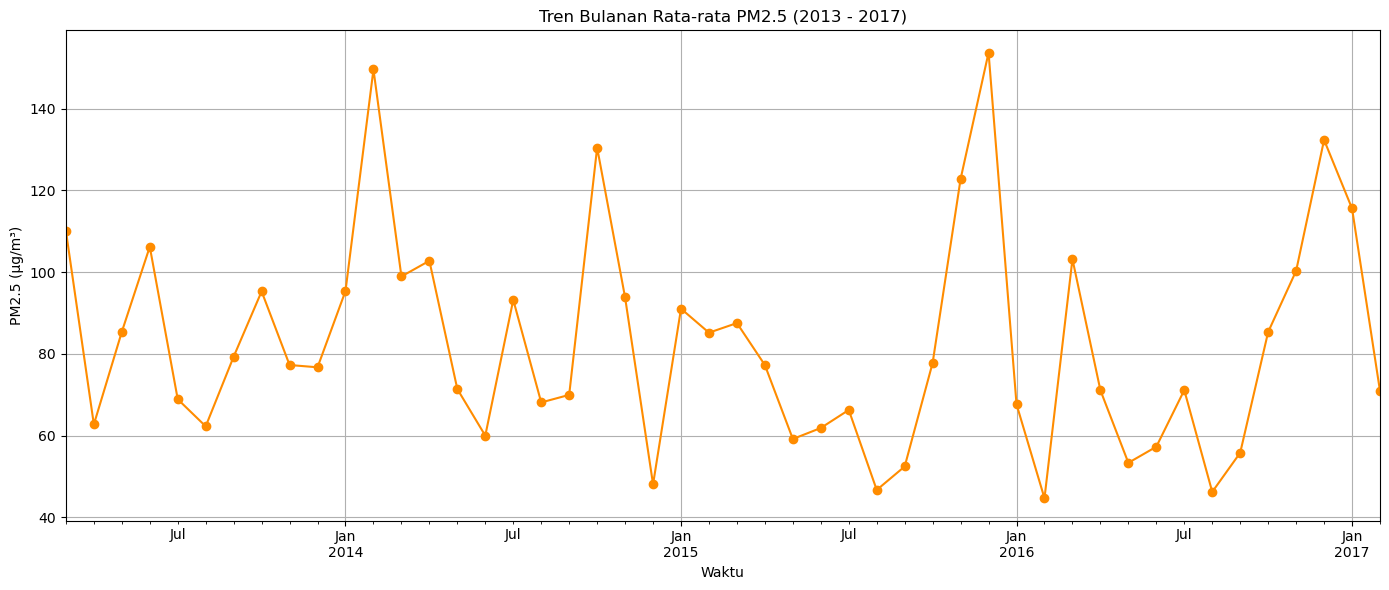

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_14668\3455776474.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=yearly_avg.index, y=yearly_avg.values, palette="rocket")


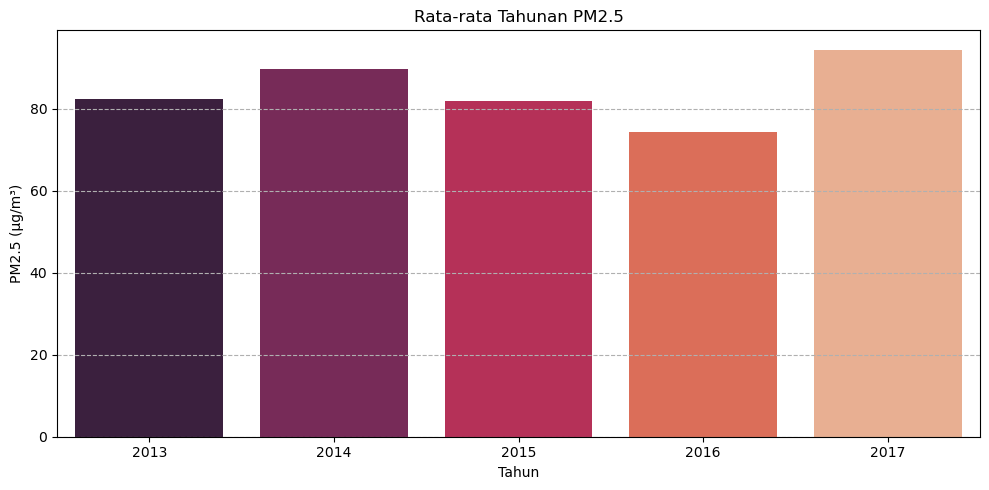

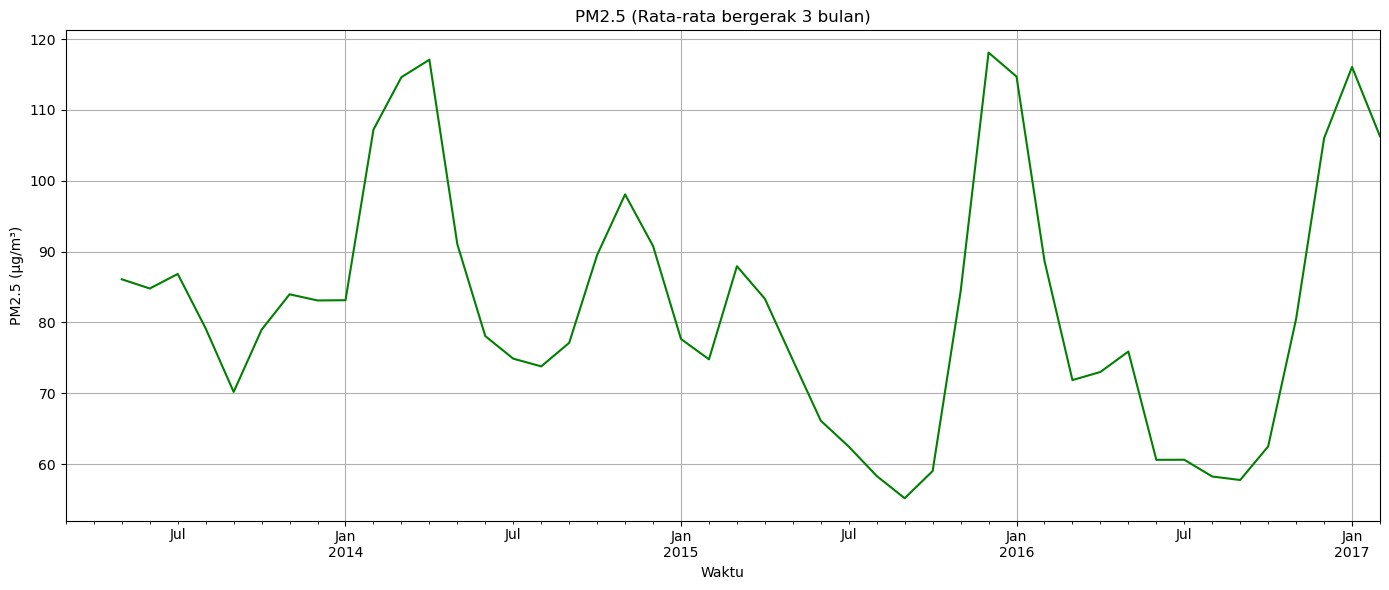

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Pastikan datetime sudah menjadi index
data_pm25 = data_kualitas_udara["PM2.5 (Partikulat halus)"].resample("ME").mean()

# Tambahkan kolom tahun
data_kualitas_udara["year"] = data_kualitas_udara.index.year
data_kualitas_udara["month"] = data_kualitas_udara.index.month

# 1. Plot tren rata-rata PM2.5 bulanan
plt.figure(figsize=(14, 6))
data_pm25.plot(marker='o', linestyle='-', color='darkorange')
plt.title("Tren Bulanan Rata-rata PM2.5 (2013 - 2017)")
plt.xlabel("Waktu")
plt.ylabel("PM2.5 (μg/m³)")
plt.grid(True)
plt.tight_layout()
plt.show()

# 2. Plot rata-rata PM2.5 tahunan
plt.figure(figsize=(10, 5))
yearly_avg = data_kualitas_udara.groupby("year")["PM2.5 (Partikulat halus)"].mean()
sns.barplot(x=yearly_avg.index, y=yearly_avg.values, palette="rocket")
plt.title("Rata-rata Tahunan PM2.5")
plt.ylabel("PM2.5 (μg/m³)")
plt.xlabel("Tahun")
plt.grid(axis="y", linestyle="--")
plt.tight_layout()
plt.show()

# 3. Opsional: Moving Average 3 Bulan
plt.figure(figsize=(14, 6))
data_pm25.rolling(window=3).mean().plot(color='green')
plt.title("PM2.5 (Rata-rata bergerak 3 bulan)")
plt.ylabel("PM2.5 (μg/m³)")
plt.xlabel("Waktu")
plt.grid(True)
plt.tight_layout()
plt.show()


- Dapat disimpulkan bahwa tahun tertinggi rata-rata polutan partikulat halus terjadi pada tahun 2017
- Pergerakan polutan partikulat halus menunjukkan tren peningkatan yang signifikan dibandingkan tahun-tahun sebelumnya
- Dapat dilihat pergerakan perbulannya, mendekati akhir tahun 2015 terjadi peningkatan secara signifikan

### Pertanyaan 2: Pada bulan atau musim apa polusi paling tinggi terjadi?

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_14668\669012146.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=monthly_avg_pm25.index, y=monthly_avg_pm25.values, palette="coolwarm")


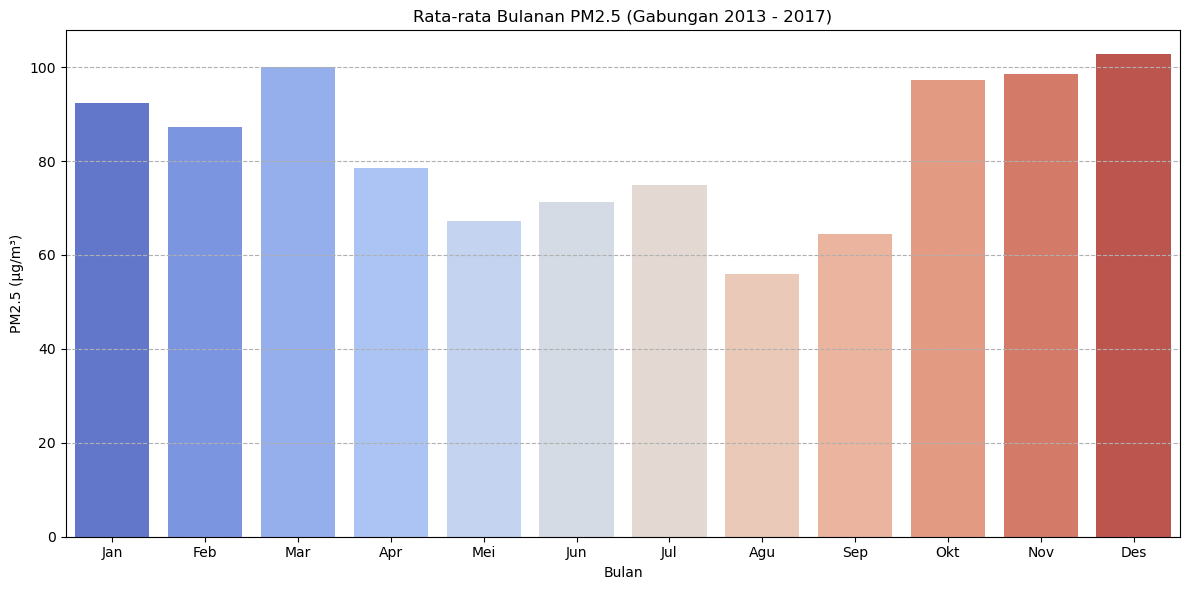

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_14668\669012146.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="month", y="PM2.5 (Partikulat halus)", data=data_kualitas_udara, palette="coolwarm")


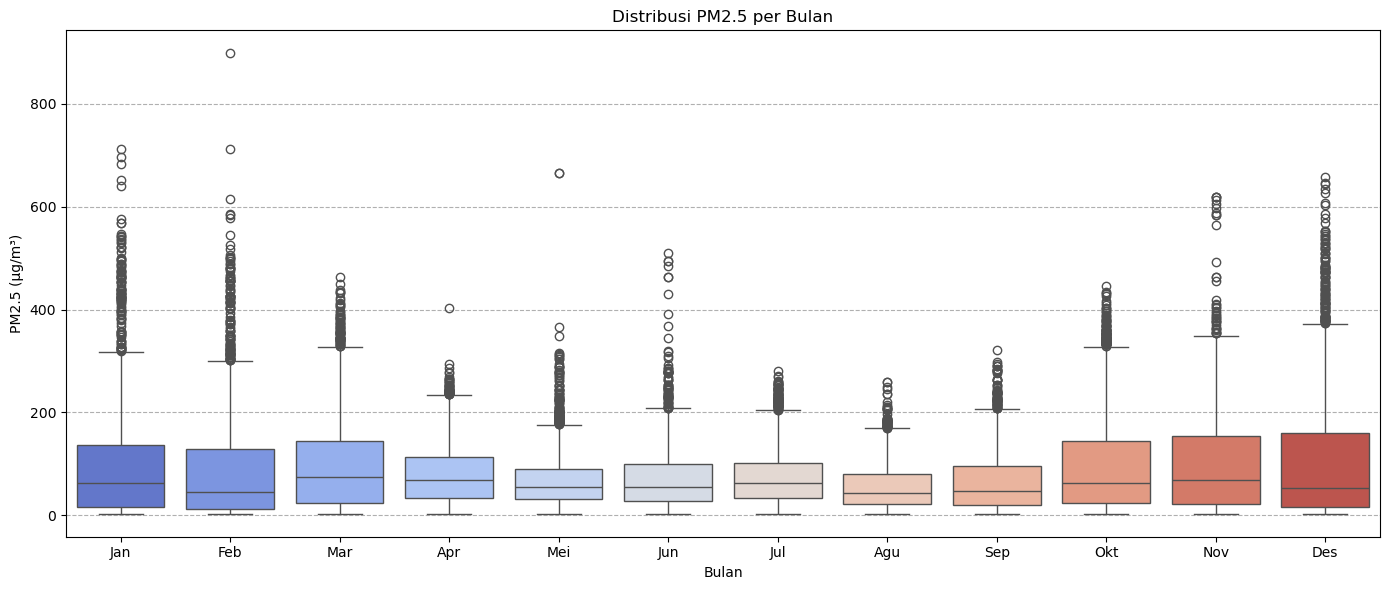

In [18]:
# Pastikan kolom 'month' sudah ada
data_kualitas_udara["month"] = data_kualitas_udara.index.month

# 1. Hitung rata-rata PM2.5 tiap bulan (gabungan semua tahun)
monthly_avg_pm25 = data_kualitas_udara.groupby("month")["PM2.5 (Partikulat halus)"].mean()

# 2. Visualisasi rata-rata PM2.5 per bulan
plt.figure(figsize=(12, 6))
sns.barplot(x=monthly_avg_pm25.index, y=monthly_avg_pm25.values, palette="coolwarm")
plt.title("Rata-rata Bulanan PM2.5 (Gabungan 2013 - 2017)")
plt.xlabel("Bulan")
plt.ylabel("PM2.5 (μg/m³)")
plt.xticks(ticks=range(0,12), labels=["Jan", "Feb", "Mar", "Apr", "Mei", "Jun", "Jul", "Agu", "Sep", "Okt", "Nov", "Des"])
plt.grid(axis="y", linestyle="--")
plt.tight_layout()
plt.show()

# 3. (Opsional) Boxplot distribusi PM2.5 per bulan
plt.figure(figsize=(14, 6))
sns.boxplot(x="month", y="PM2.5 (Partikulat halus)", data=data_kualitas_udara, palette="coolwarm")
plt.title("Distribusi PM2.5 per Bulan")
plt.xlabel("Bulan")
plt.ylabel("PM2.5 (μg/m³)")
plt.xticks(ticks=range(0,12), labels=["Jan", "Feb", "Mar", "Apr", "Mei", "Jun", "Jul", "Agu", "Sep", "Okt", "Nov", "Des"])
plt.grid(axis="y", linestyle="--")
plt.tight_layout()
plt.show()


- Dapat dilihat bahwa bulan yang mengandung partikulat halus tertinggi pada bulan desember dan maret
- Bulan terbersih yaitu pada bulan agustus
- variasi polusi yang tidak stabil terjadi pada bulan oktober-maret

### Pertanyaan 3: Bagaimana hubungan antara suhu udara (TEMP) dan polutan utama (PM2.5, PM10, CO)?

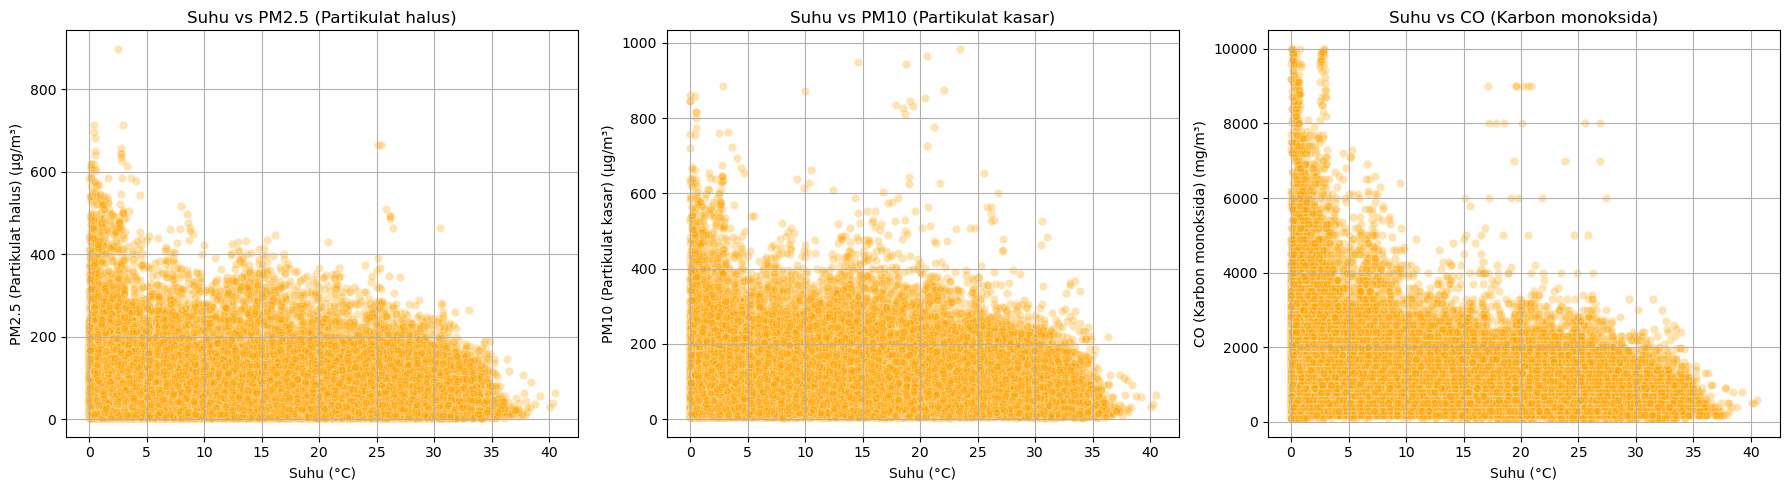

Korelasi antara suhu udara dan polutan:
PM2.5 (Partikulat halus)   -0.125948
PM10 (Partikulat kasar)    -0.115870
CO (Karbon monoksida)      -0.351052
Name: TEMP (Suhu udara), dtype: float64


In [19]:
# Plot scatter antara suhu dan masing-masing polutan
pollutants = ["PM2.5 (Partikulat halus)", "PM10 (Partikulat kasar)", "CO (Karbon monoksida)"]
plt.figure(figsize=(18, 5))

for i, polutan in enumerate(pollutants, 1):
    plt.subplot(1, 3, i)
    sns.scatterplot(data=data_kualitas_udara, x="TEMP (Suhu udara)", y=polutan, alpha=0.3, color="orange")
    plt.title(f"Suhu vs {polutan}")
    plt.xlabel("Suhu (°C)")
    plt.ylabel(f"{polutan} (μg/m³)" if polutan != "CO (Karbon monoksida)" else f"{polutan} (mg/m³)")
    plt.grid(True)

plt.tight_layout()
plt.show()

# Korelasi antar variabel
correlations = data_kualitas_udara[[
    "TEMP (Suhu udara)", 
    "PM2.5 (Partikulat halus)", 
    "PM10 (Partikulat kasar)", 
    "CO (Karbon monoksida)"
]].corr()

print("Korelasi antara suhu udara dan polutan:")
print(correlations["TEMP (Suhu udara)"].drop("TEMP (Suhu udara)"))


1. Hubungan negatif secara umum:
Ketiga polutan menunjukkan hubungan negatif terhadap suhu udara, artinya semakin tinggi suhu, konsentrasi polutan cenderung lebih rendah.

2. PM2.5 dan PM10:
- Korelasi negatifnya lemah, tapi masih terlihat pola penurunan konsentrasi partikulat saat suhu meningkat.
- Ini bisa dikaitkan dengan pergerakan udara yang lebih aktif saat suhu tinggi, yang membantu menyebarkan polutan.

3. CO (Karbon monoksida):
- Korelasi lebih kuat dibanding dua lainnya (-0.35), menunjukkan hubungan yang lebih konsisten.
- Bisa terjadi karena CO berasal dari pembakaran, dan suhu tinggi sering berasosiasi dengan kondisi atmosfer yang membantu difusi CO ke lapisan atas.

📌 Kesimpulan Umum:
Terdapat kecenderungan penurunan konsentrasi polutan saat suhu meningkat.

CO lebih sensitif terhadap perubahan suhu dibanding partikulat PM2.5 dan PM10.

Visualisasi membantu melihat kerapatan data yang tinggi pada suhu rendah (0–20°C), yang juga menjadi indikasi konsentrasi polutan lebih besar saat suhu lebih dingin.

### Pertanyaan 4: Apakah arah dan kecepatan angin memengaruhi konsentrasi polusi udara?

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 35064 entries, 2013-03-01 00:00:00 to 2017-02-28 23:00:00
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   PM2.5 (Partikulat halus)  35064 non-null  float64
 1   PM10 (Partikulat kasar)   35064 non-null  float64
 2   SO2 (Sulfur dioksida)     35064 non-null  float64
 3   NO2 (Nitrogen dioksida)   35064 non-null  float64
 4   CO (Karbon monoksida)     35064 non-null  float64
 5   O3 (Ozon)                 35064 non-null  float64
 6   TEMP (Suhu udara)         35056 non-null  float64
 7   PRES (Tekanan udara)      35064 non-null  float64
 8   DEWP (Titik embun)        35064 non-null  float64
 9   RAIN (Curah hujan)        35064 non-null  float64
 10  wd (Arah angin)           35064 non-null  object 
 11  WSPM (Kecepatan angin)    35064 non-null  float64
 12  station (nama stasiun)    35064 non-null  object 
 13  year                      

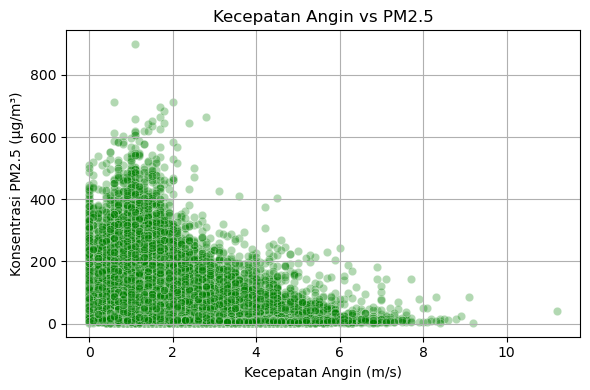

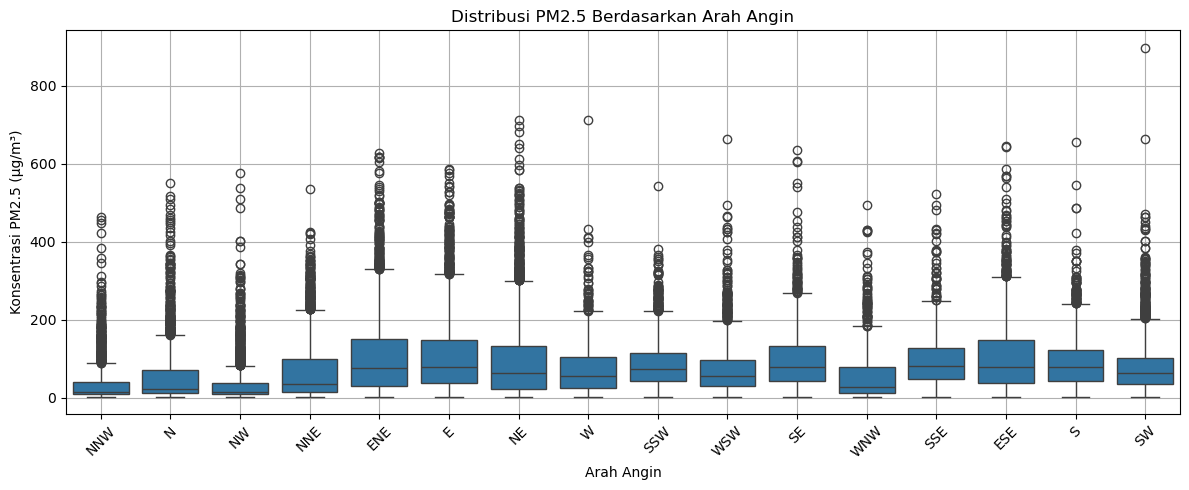

In [20]:
data_kualitas_udara.info()
# Korelasi kecepatan angin dan PM2.5
corr_wspm_pm25 = data_kualitas_udara["WSPM (Kecepatan angin)"].corr(data_kualitas_udara["PM2.5 (Partikulat halus)"])
print("Korelasi WSPM (kecepatan angin) vs PM2.5:", corr_wspm_pm25)

# Scatterplot
plt.figure(figsize=(6,4))
sns.scatterplot(x="WSPM (Kecepatan angin)", y="PM2.5 (Partikulat halus)", data=data_kualitas_udara, alpha=0.3, color="green")
plt.title("Kecepatan Angin vs PM2.5")
plt.xlabel("Kecepatan Angin (m/s)")
plt.ylabel("Konsentrasi PM2.5 (µg/m³)")
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12,5))
sns.boxplot(x="wd (Arah angin)", y="PM2.5 (Partikulat halus)", data=data_kualitas_udara)
plt.title("Distribusi PM2.5 Berdasarkan Arah Angin")
plt.xlabel("Arah Angin")
plt.ylabel("Konsentrasi PM2.5 (µg/m³)")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



Kesimpulan:
1. Pengaruh Kecepatan Angin terhadap PM2.5:
- Polusi menurun saat kecepatan angin meningkat.
Terlihat pola negatif (menurun): semakin tinggi kecepatan angin, semakin rendah konsentrasi PM2.5.

- Korelasi negatif ini masuk akal karena angin dapat menyebarkan polutan di atmosfer, sehingga mengurangi konsentrasinya di satu titik pengukuran.

2. Pengaruh Arah Angin terhadap PM2.5:
- Dari boxplot terlihat bahwa arah angin dari timur dan timur laut (E, ENE, NE) cenderung menunjukkan konsentrasi PM2.5 lebih tinggi dibandingkan arah lain.

- Arah angin tertentu mungkin membawa polutan dari wilayah yang lebih tercemar (misalnya kawasan industri, lalu lintas padat, atau daerah padat penduduk).

## Analisis Lanjutan


**- Analisis Musiman (Seasonal Trends)**

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 35064 entries, 2013-03-01 00:00:00 to 2017-02-28 23:00:00
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   PM2.5 (Partikulat halus)  35064 non-null  float64
 1   PM10 (Partikulat kasar)   35064 non-null  float64
 2   SO2 (Sulfur dioksida)     35064 non-null  float64
 3   NO2 (Nitrogen dioksida)   35064 non-null  float64
 4   CO (Karbon monoksida)     35064 non-null  float64
 5   O3 (Ozon)                 35064 non-null  float64
 6   TEMP (Suhu udara)         35056 non-null  float64
 7   PRES (Tekanan udara)      35064 non-null  float64
 8   DEWP (Titik embun)        35064 non-null  float64
 9   RAIN (Curah hujan)        35064 non-null  float64
 10  wd (Arah angin)           35064 non-null  object 
 11  WSPM (Kecepatan angin)    35064 non-null  float64
 12  station (nama stasiun)    35064 non-null  object 
 13  year                      

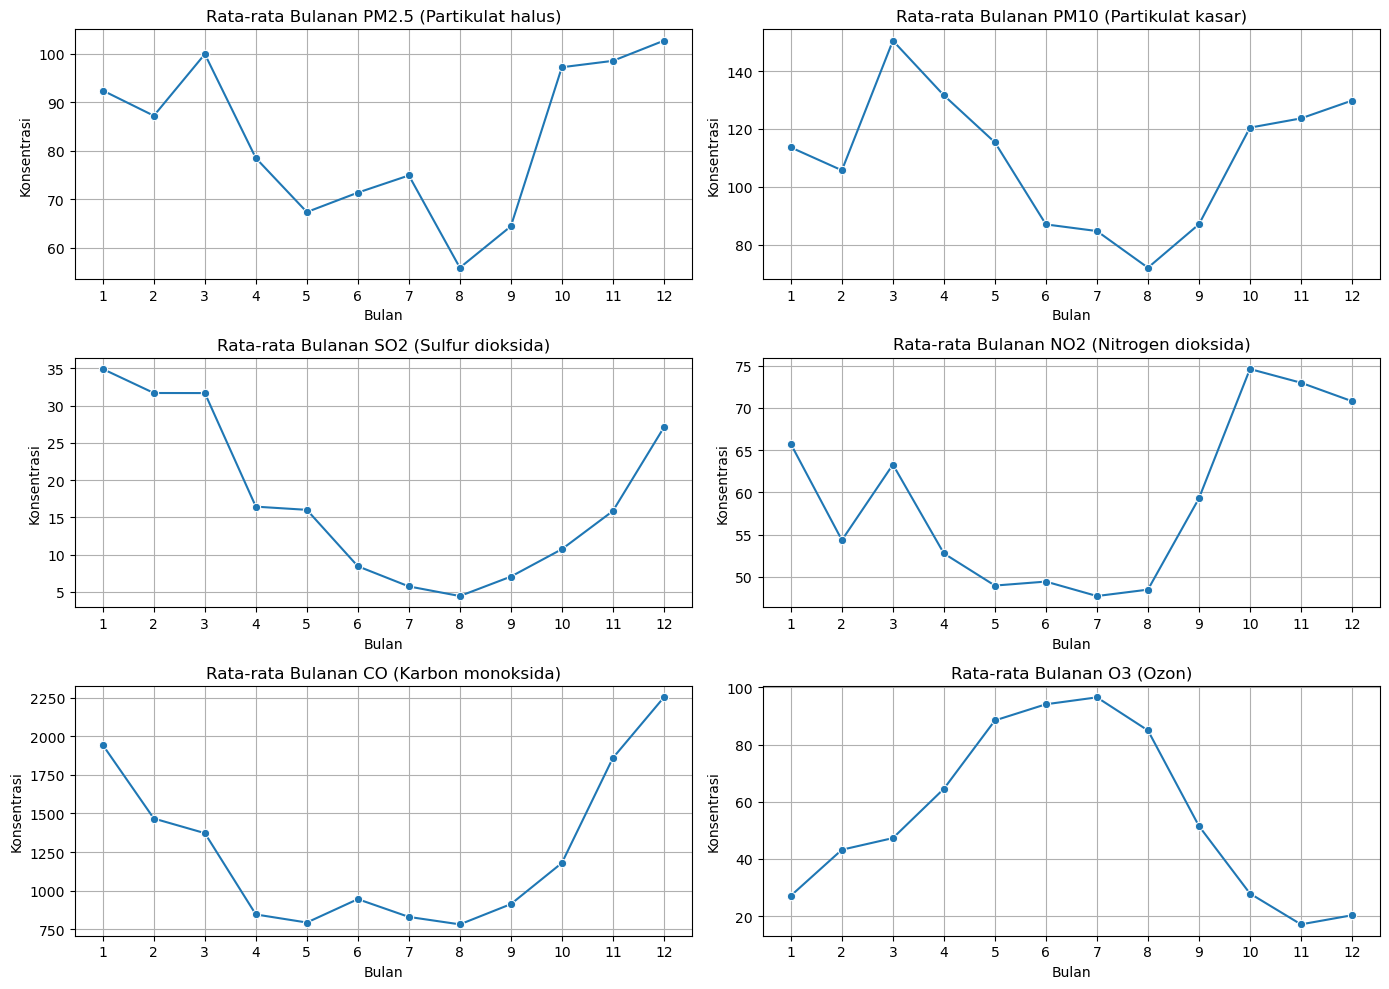

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_14668\3598580946.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=musiman.index, y=musiman.values, palette='viridis')
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_14668\3598580946.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=musiman.index, y=musiman.values, palette='viridis')
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_14668\3598580946.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=musiman.index, y=musiman.values, palette='viridis')
C:\Users\LENOVO\AppData\Local\Temp\ipyke

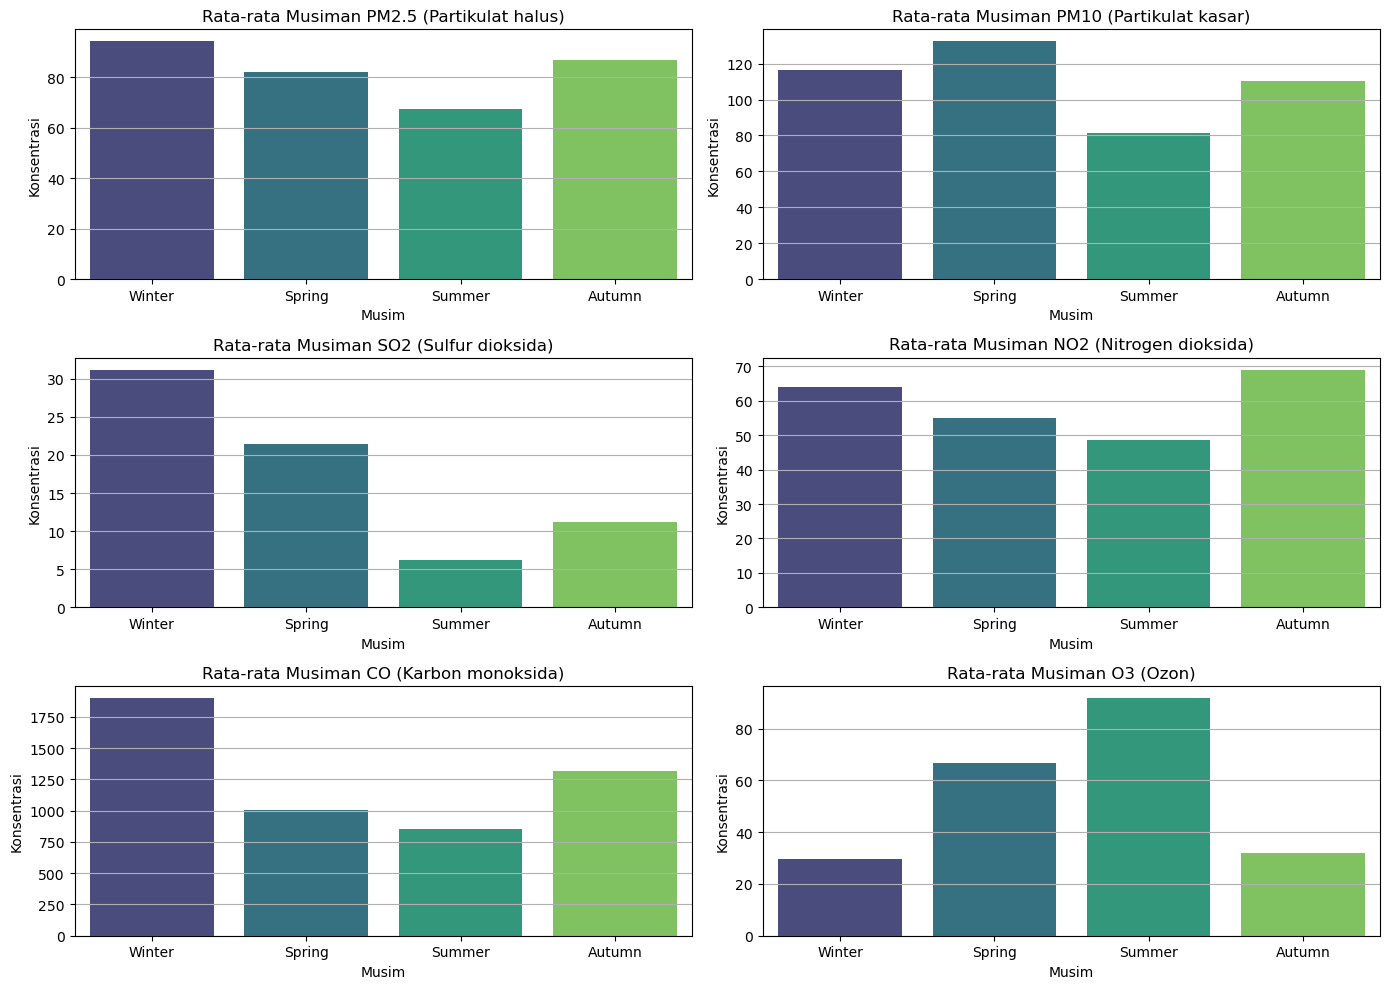

In [21]:
data_kualitas_udara.info()

# Tambah kolom bulan jika belum ada
data_kualitas_udara['month'] = data_kualitas_udara.index.month

# List polutan utama
polutan_cols = [
    "PM2.5 (Partikulat halus)", 
    "PM10 (Partikulat kasar)", 
    "SO2 (Sulfur dioksida)",
    "NO2 (Nitrogen dioksida)", 
    "CO (Karbon monoksida)", 
    "O3 (Ozon)"
]

# Plot tren bulanan untuk masing-masing polutan
plt.figure(figsize=(14, 10))
for i, polutan in enumerate(polutan_cols):
    plt.subplot(3, 2, i+1)
    bulanan = data_kualitas_udara.groupby('month')[polutan].mean()
    sns.lineplot(x=bulanan.index, y=bulanan.values, marker='o')
    plt.title(f"Rata-rata Bulanan {polutan}")
    plt.xlabel("Bulan")
    plt.ylabel("Konsentrasi")
    plt.xticks(range(1, 13))
    plt.grid(True)

plt.tight_layout()
plt.show()

# Tambahkan kolom musim jika belum ada
def tentukan_musim(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Autumn'

data_kualitas_udara['musim'] = data_kualitas_udara['month'].apply(tentukan_musim)

# Plot bar chart rata-rata musiman untuk setiap polutan
plt.figure(figsize=(14, 10))
for i, polutan in enumerate(polutan_cols):
    plt.subplot(3, 2, i+1)
    musiman = data_kualitas_udara.groupby("musim")[polutan].mean().reindex(["Winter", "Spring", "Summer", "Autumn"])
    sns.barplot(x=musiman.index, y=musiman.values, palette='viridis')
    plt.title(f"Rata-rata Musiman {polutan}")
    plt.xlabel("Musim")
    plt.ylabel("Konsentrasi")
    plt.grid(True, axis='y')

plt.tight_layout()
plt.show()


**- Clustering: Pengelompokan Hari Berdasarkan Polusi**

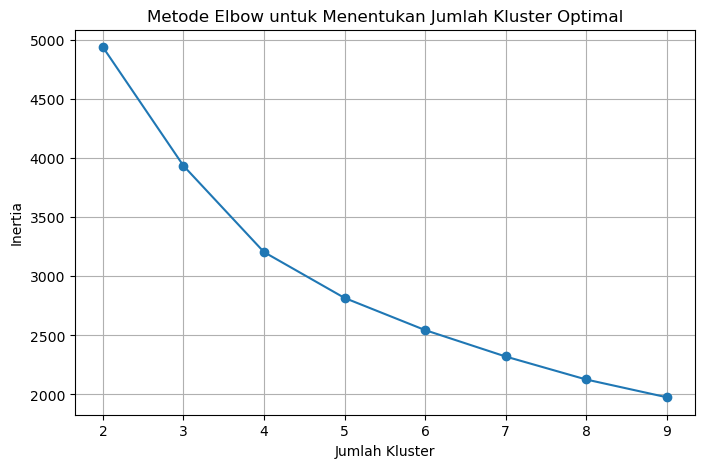

In [22]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Ambil rata-rata harian untuk semua polutan
daily_pollution = data_kualitas_udara[polutan_cols].resample("D").mean().dropna()

# Normalisasi data
scaler = StandardScaler()
daily_scaled = scaler.fit_transform(daily_pollution)

# Tentukan jumlah kluster optimal (elbow method)
inertia = []
range_n = range(2, 10)
for n in range_n:
    kmeans = KMeans(n_clusters=n, random_state=42, n_init=10)
    kmeans.fit(daily_scaled)
    inertia.append(kmeans.inertia_)

# Visualisasi elbow
plt.figure(figsize=(8, 5))
plt.plot(range_n, inertia, marker="o")
plt.xlabel("Jumlah Kluster")
plt.ylabel("Inertia")
plt.title("Metode Elbow untuk Menentukan Jumlah Kluster Optimal")
plt.grid(True)
plt.show()


membuat grafik dengan metode elbow yang bertujuan untuk menentukan jumlah kluster optimal saat melakukan clustering(pengelompokan data) selanjutnya saya akan memakai jumlah kluster 3

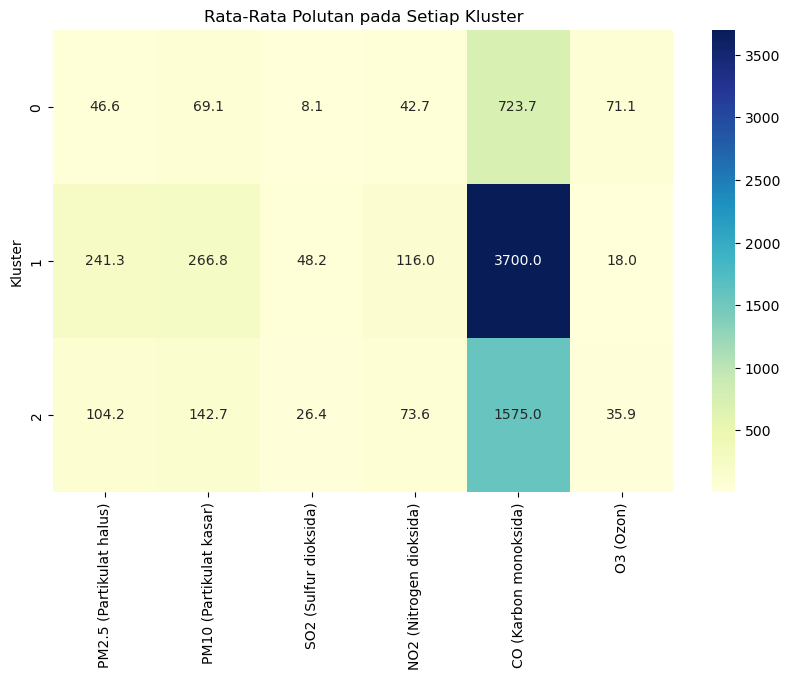

In [23]:
# Terapkan KMeans
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
daily_pollution['Kluster'] = kmeans.fit_predict(daily_scaled)

# Visualisasi rata-rata polusi per kluster
plt.figure(figsize=(10, 6))
cluster_avg = daily_pollution.groupby("Kluster")[polutan_cols].mean()
sns.heatmap(cluster_avg, annot=True, cmap="YlGnBu", fmt=".1f")
plt.title("Rata-Rata Polutan pada Setiap Kluster")
plt.show()


Berdasarkan karakteristik:
- kluster 0: kualitas udara bersih 
- kluster 1: kualitas udara sangat tercemar (terburuk)
- kluster 2: kualitas udara sedang

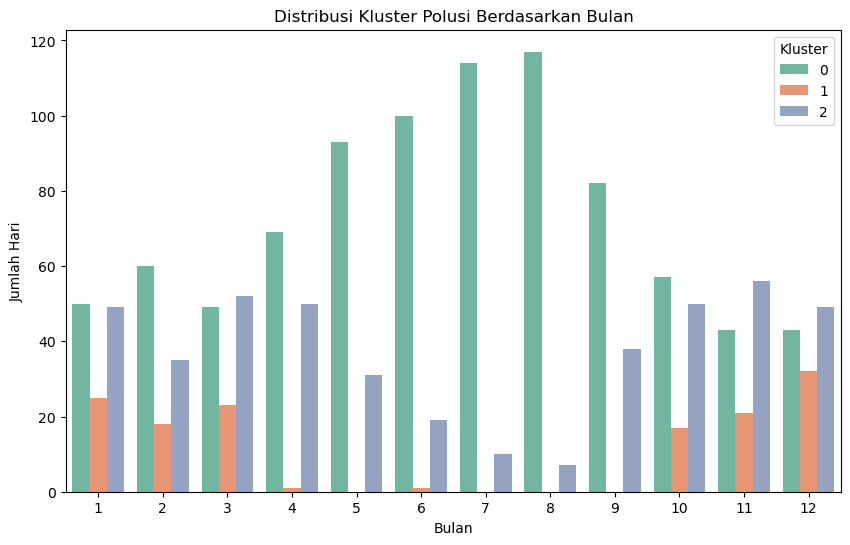

In [24]:
# Tambahkan kolom tanggal
daily_pollution["tanggal"] = daily_pollution.index

# Visualisasi distribusi kluster berdasarkan bulan
daily_pollution["bulan"] = daily_pollution["tanggal"].dt.month

plt.figure(figsize=(10, 6))
sns.countplot(x="bulan", hue="Kluster", data=daily_pollution, palette="Set2")
plt.title("Distribusi Kluster Polusi Berdasarkan Bulan")
plt.xlabel("Bulan")
plt.ylabel("Jumlah Hari")
plt.legend(title="Kluster")
plt.show()


kesimpulan berdasarkan kluster:
1. **kluster 0 (udara bersih)**
* Mendominasi dari Mei hingga Agustus, dengan puncaknya di Agustus (kluster 0 > 110 hari).

* Bulan-bulan ini menunjukkan kondisi udara terbaik sepanjang tahun.

2. **Kluster 1 (udara sangat tercemar)**
* Muncul dominan di bulan Desember dan Januari
* Hampir tidak terlihat pada bulan Juni–Agustus

3. **Kluster 2 (udara sedang)**
* Tersebar merata sepanjang tahun, namun lebih banyak muncul di musim gugur dan awal tahun (Jan–Apr dan Okt–Des)

* Menunjukkan masa transisi antara musim dengan polusi tinggi dan musim dengan udara bersih.

## Conclusion

Pertanyaan:
1. Bagaimana tren polusi udara partikulat halus (PM2.5) berubah dari tahun ke tahun?
2. Pada bulan atau musim apa polusi paling tinggi terjadi?
3. Bagaimana hubungan antara suhu udara (TEMP) dan polutan utama (PM2.5, PM10, CO)?
4. Apakah arah dan kecepatan angin memengaruhi konsentrasi polusi udara?

1. Conclution pertanyaan 1 :
- Dapat disimpulkan bahwa tahun tertinggi rata-rata polutan partikulat halus terjadi pada tahun 2017
- Pergerakan polutan partikulat halus menunjukkan tren peningkatan yang signifikan dibandingkan tahun-tahun sebelumnya
- Dapat dilihat pergerakan perbulannya, mendekati akhir tahun 2015 terjadi peningkatan secara signifikan
2. Conclution pertanyaan 2 :
- Dapat dilihat bahwa bulan yang mengandung partikulat halus tertinggi pada bulan desember dan maret
- Bulan terbersih yaitu pada bulan agustus
- variasi polusi yang tidak stabil terjadi pada bulan oktober-maret
3. Conclution pertanyaan 3 :
- Terdapat kecenderungan penurunan konsentrasi polutan saat suhu meningkat.
- CO lebih sensitif terhadap perubahan suhu dibanding partikulat PM2.5 dan PM10.
- Visualisasi membantu melihat kerapatan data yang tinggi pada suhu rendah (0–20°C), yang juga menjadi indikasi konsentrasi polutan lebih besar saat suhu lebih dingin.
4. Conclution pertanyaan 4 : iya, karenakan disebabkan oleh kecepatan angin dan juga arah angin. berikut penjelasan lebih rinci:
## 

1. Pengaruh Kecepatan Angin terhadap PM2.5:
- Polusi menurun saat kecepatan angin meningkat.
Terlihat pola negatif (menurun): semakin tinggi kecepatan angin, semakin rendah konsentrasi PM2.5.

- Korelasi negatif ini masuk akal karena angin dapat menyebarkan polutan di atmosfer, sehingga mengurangi konsentrasinya di satu titik pengukuran.

2. Pengaruh Arah Angin terhadap PM2.5:
- Dari boxplot terlihat bahwa arah angin dari timur dan timur laut (E, ENE, NE) cenderung menunjukkan konsentrasi PM2.5 lebih tinggi dibandingkan arah lain.

- Arah angin tertentu mungkin membawa polutan dari wilayah yang lebih tercemar (misalnya kawasan industri, lalu lintas padat, atau daerah padat penduduk).